# PART A: Z Transforms
Q1. Consider the discrete time sequence x[n] = z^n with −∞ < n < ∞ where z ∈ C.. Let z = 0.95, z = 1.05, z = −1.05, z = −0.97, ##z = 1, z = −1. Now plot the sequences for different values of z. For each plot what is the nature of the plot?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi,exp
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

import cmath as cm
import math as m
import sympy as sp
from scipy import signal as sg
import signal

import pylab

C:\Users\me\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
C:\Users\me\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
C:\Users\me\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plo

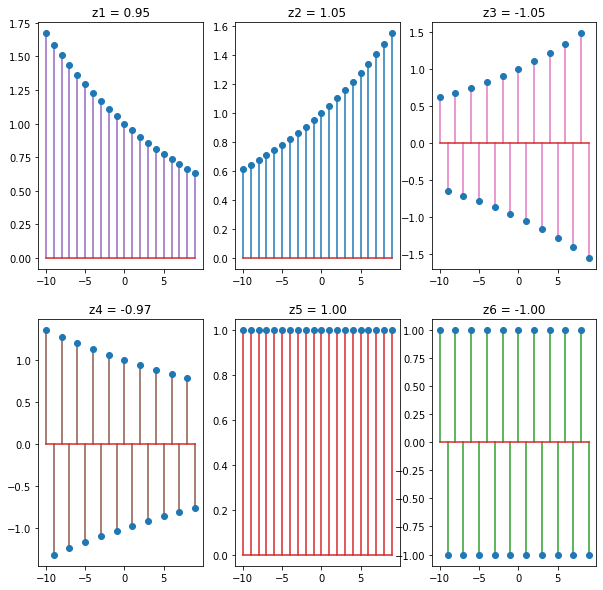

In [2]:
z = np.array([0.95,1.05,-1.05,-0.97,1,-1])
n = np.arange(-10,10,1)
fig, axs = plt.subplots(2, 3,figsize=(10,10))
color = ['tab:purple','tab:blue','tab:pink','tab:brown','tab:red','tab:green']
for i in range(6):
    x = z[i]**n
    axs[i//3, i%3].stem(n,x,color[i])
    axs[i//3, i%3].set_title("z%d = %0.2f"%((i+1),z[i]))
    

### Q2. Now consider the same sequence with complex values of z. Consider z = −2 + 3j, z = 2 − 3j, z = e^jπ/10, z = 0.95e^jπ/10, z = 1.05e^jπ/10. For these values of z create 3D plot with both real and imaginary parts. Try using different markers for real and imaginary parts.

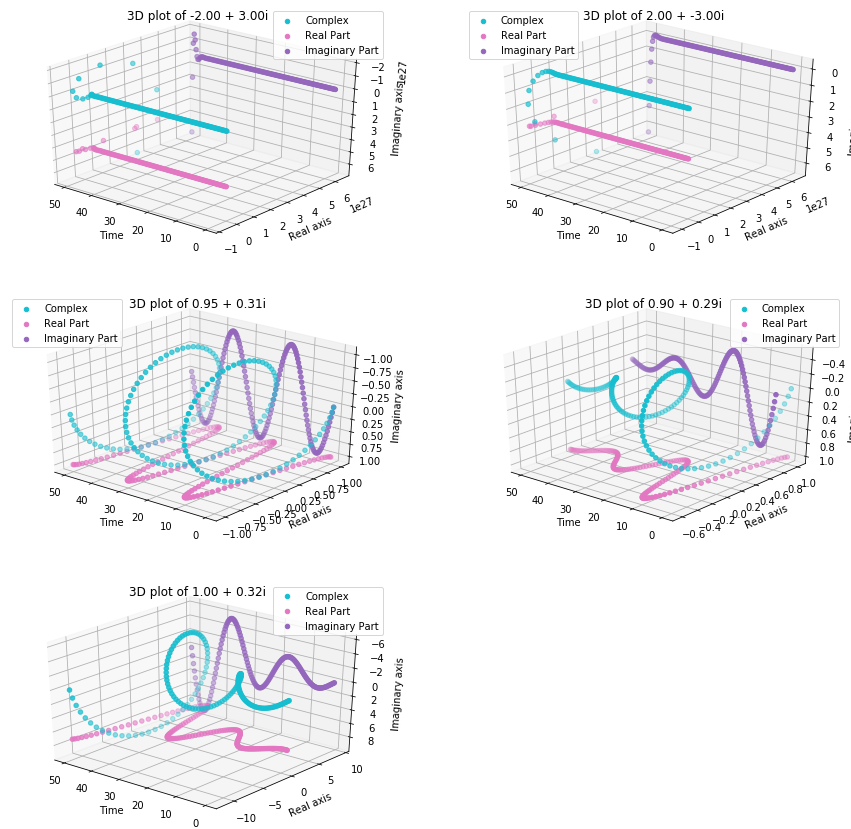

In [3]:
import cmath as cm
z=np.array([-2+3j ,2-3j,cm.rect(1,pi/10),cm.rect(0.95,pi/10),cm.rect(1.05,pi/10)])
n = np.linspace(0,50,150)
fig = plt.figure(figsize=(15,15))
for i in range(5):
  c = z[i]**n
  zeros = np.array([0]*(len(n)))
  ones = np.array([1]*(len(n)))
  x = c.real
  y = c.imag
  ax = fig.add_subplot(3, 2, i+1, projection='3d')
  ax.scatter3D(n,x,y,color = 'tab:cyan')
  ax.scatter3D(n,x,max(x)*ones,color = 'tab:pink')
  ax.scatter3D(n,max(y)*ones,y,color = "tab:purple")
  ax.legend(['Complex','Real Part','Imaginary Part'])
  ax.view_init(-150, 50)
  ax.set_xlabel('Time')
  ax.set_ylabel('Real axis')
  ax.set_zlabel("Imaginary axis")
  ax.set_title("3D plot of %0.2f + %0.2fi"%(z[i].real,z[i].imag))

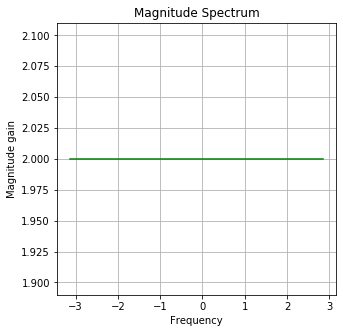

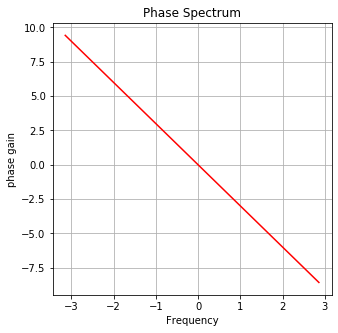

In [4]:
omega = np.arange(-pi,pi)
magnitude_spectrum = np.array([2]*len(omega))
phase_spectrum = -3*omega
plt.figure(1,figsize=(5,5))
plt.grid()
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude gain")
plt.plot(omega,magnitude_spectrum,color='green')
plt.figure(2,figsize=(5,5))
plt.title("Phase Spectrum")
plt.xlabel("Frequency")
plt.ylabel("phase gain")
plt.plot(omega,phase_spectrum,color='red')
plt.grid()

#### Q3. Consider the system y[n] = 2x[n - 3], the input to this system is the sequence zn where z belong to the sequences in the previous section (all complex). Find the response of the system. Also find the corresponding eigen values of the response

In [5]:
n=np.linspace(0,9,10)
Impulse_res=2*((n-3)==0)
print(Impulse_res) 

[0 0 0 2 0 0 0 0 0 0]


[0 0 0 2 0 0 0 0 0 0]
[ 0.        +0.j          0.        +0.j          0.        +0.j
 -4.        +6.j          4.        -6.j          1.90211303+0.61803399j
  1.80700738+0.58713229j  1.99721868+0.64893569j  0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j        ]


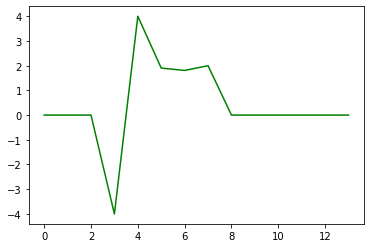

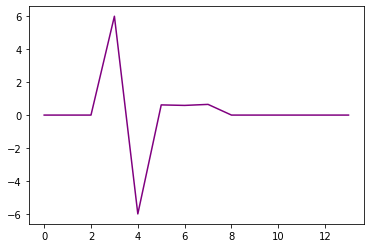

In [6]:
def convolution(inputSeq, impulseResponse):
    inputSeq = np.array(inputSeq)
    impulseResponse = np.array(impulseResponse)
    n1=len(inputSeq)
    n2=len(impulseResponse)
    outputSeq=[]
    
    for n in range(n1+n2-1):
        summ=0
        for k in range(n1):
            if n-k>=0 and n-k<=n2-1:
                summ=summ+inputSeq[k]*impulseResponse[n-k]
        outputSeq=np.append(outputSeq,summ)
    return outputSeq
n=np.linspace(0,9,10)
Impulse_res=2*((n-3)==0)
print(Impulse_res)
plt.figure()
response=np.array(convolution(z,Impulse_res))
print(response)
p=np.linspace(0,13,14)
plt.plot(p,response.real,color='green')
plt.figure()
plt.plot(p,response.imag,color='purple')

In [7]:
z=sp.Symbol("z")
a=sp.Symbol("a")
u=sp.Symbol("u")
n=sp.Symbol("n")
def z_u(a,u,n,p):
    inp=a**n
    prod=inp*(z**n)
    CR=a*(z**-1)
    summ=((z**-p)*1/(1-CR))
    return summ
sp.pprint(z_u(3,u,n,4))

    1     
──────────
 4 ⎛    3⎞
z ⋅⎜1 - ─⎟
   ⎝    z⎠


In [8]:
a=sp.Symbol("a")
def z_trans_u(a,p):
    f=(z**-p)*1/(1-a*z**-1)
    return f
res=(z_u(1,u,n,0))
sp.pprint(res)

  1  
─────
    1
1 - ─
    z


In [9]:
dell=((n-3)==0)
def z_del(a,dell,n,p):
    return a*(z**-p)
sp.pprint(z_del(1,dell,n,3))
dell=((n-3)==0)
(z_del(1,dell,n,0))

1 
──
 3
z 


1

#### Q4.Compute the Z Transform for the basic signals: [n], u[n], r[n], nu[n], nnu[n], rn cos !0nu[n]. Choose specic values for each and visualize the magnitude and phase spectrums. Also plot the poles and zeros with the ROC. For which values if any the Z Transform doesnot exist? Try nding out the Z Transform outside the ROC.

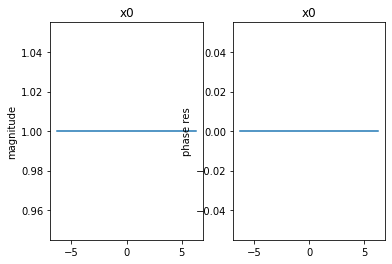

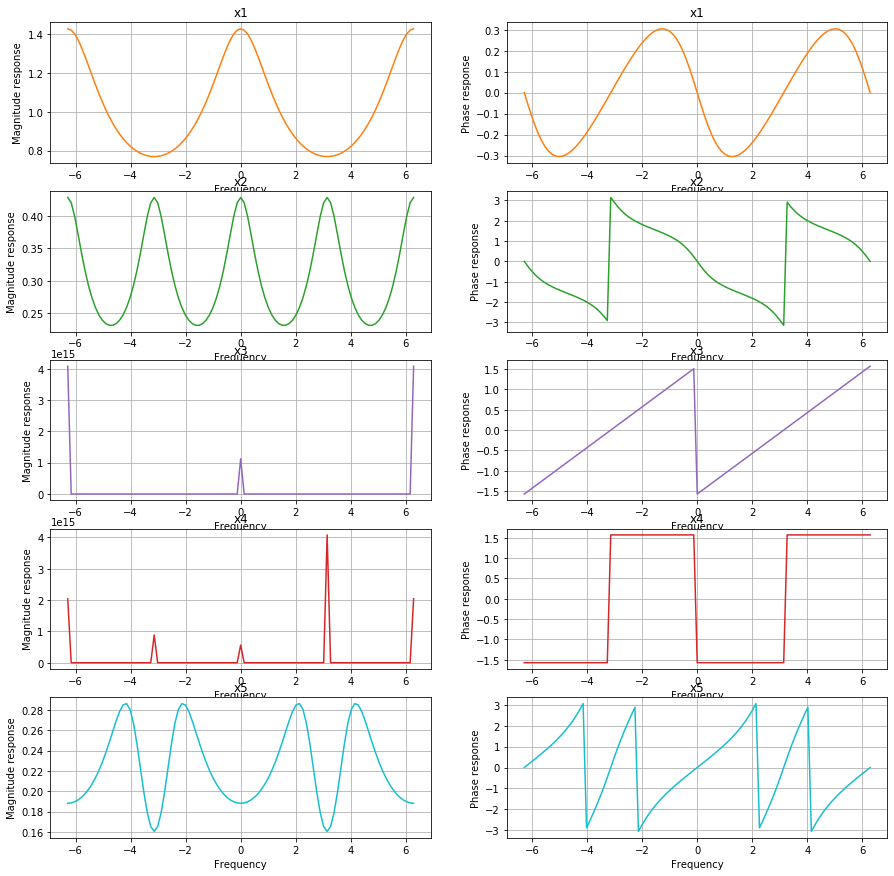

In [10]:
omg = np.linspace(-2*pi,2*pi,101)
x1 = 1
x2 = 1/(1-0.3*np.exp(omg*-1j))
x3 = (0.3*np.exp(omg*-1j))/(1-0.3*np.exp(omg*-1j)**2)
x4 = 1/(1-(2*0.5*np.exp(omg*-1j)))
x5 = (2*0.5*np.exp(omg*-1j))/(1-2*0.5*np.exp(omg*-1j)**2)
x6 = (1 - 2*0.3*np.exp(omg*-1j)*cos(3))/(1 - 2*3*(0.5*np.exp(omg*-1j))*cos(3) + (3**(2))*(0.5*exp(omg*-1j)**2))
#plotting x1


color = ['tab:orange','tab:green','tab:purple','tab:red','tab:cyan','tab:grey']
plt.subplot(1,2,1)
mag = np.array([1]*len(omg))
phase = np.array([0]*len(omg))
plt.plot(omg,mag)
plt.title("x0")
plt.ylabel('magnitude')
plt.subplot(1,2,2)
plt.plot(omg,phase)
plt.title("x0")
plt.ylabel('phase res')
lst = [x2,x3,x4,x5,x6]






void, axs = plt.subplots(5, 2,figsize=(15,15))
for j in range(5):
    x = lst[j]
    lst_r = []
    lst_phi = []
    for i in range(len(omg)):
        r,phi = cm.polar(x[i])
        lst_r.append(r)
        lst_phi.append(phi)
    axs[j,0].plot(omg,lst_r,color[j])
    axs[j,0].grid("on")
    axs[j,0].set_title("x%d"%(j+1))
    axs[j,0].set_xlabel('Frequency')
    axs[j,0].set_ylabel('Magnitude response')
    axs[j,1].plot(omg,lst_phi,color[j])
    axs[j,1].set_title("x%d"%(j+1))
    axs[j,1].set_xlabel('Frequency')
    axs[j,1].set_ylabel('Phase response')
    axs[j,1].grid("on")

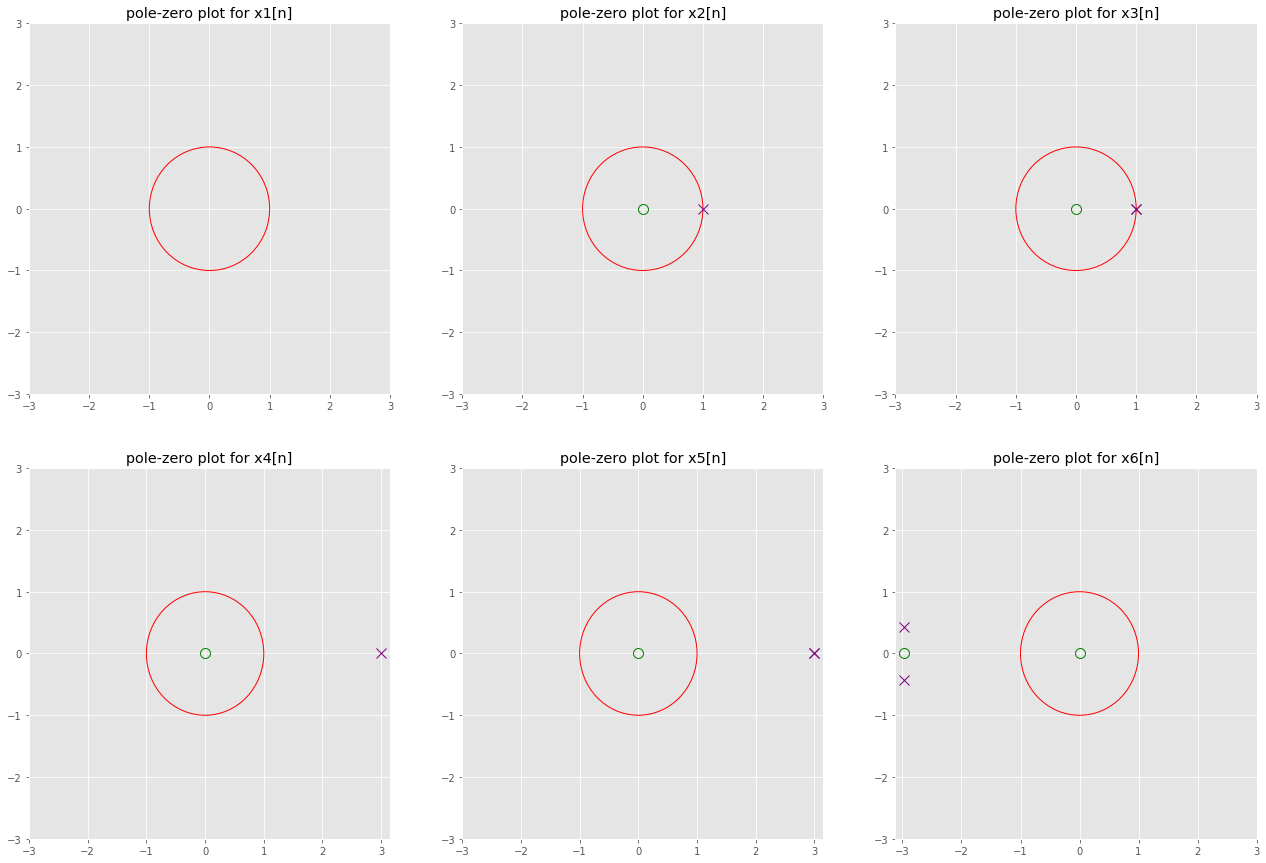

In [19]:
num = np.array([[1], [1,0], [1,0], [1,0], [3,0], [1,-3*np.cos(3),0]])
den = np.array([[1], [1,-1],[1,-2,1], [1,-3], [1,-6,9], [1,-6*np.cos(3),9]])

fig, axs = plt.subplots(2,3,figsize=(22,15))
for i in range(6):
  p = np.roots(den[i])
  z = np.roots(num[i])
  plt.subplot(2,3,i+1) 
  for j in range(len(p)):
    plt.plot(p[j].real, p[j].imag, 'x', markersize=10, alpha=1,color="purple")
  for j in range(len(z)):
    plt.plot(z[j].real, z[j].imag,  'o', markersize=10, alpha=1,markeredgecolor='green',color="none")
  plt.grid(True)
  plt.title("pole-zero plot for x%d[n]"%(i+1))
  ticks = [-3,-2,-1,0,1,2,3]
  plt.xticks(ticks)
  plt.yticks(ticks)
  ax = fig.gca()
  circle1 = plt.Circle((0, 0), 1, color='r',fill=False,lw=1)
  ax.add_patch(circle1)

# Discrete Time Fourier Series:¶
For a signal x[n] with fundamental period N, the DTFS representation is as follows: x[n] = N X−1 k=0 ake jk(2π/N)n The DTFS coefficients are defined by following relation: x[n] = 1 N N X−1 n=0 x[n]e −jk(2π/N)n The DTFS coefficients of a periodic discrete time signal with period N = 5 are given below: a0 = 1, a2 = a ∗ −2 = e jπ/4 , a4 = a ∗ −4 = 2e jπ/3 Using the properties of DTFS, determine the values of a0 through a4. Using these coefficients, determine one period of the signal and display a labelled plot. Consider a periodic square wave with fundamental period N = 16 having magnitude 1 between n = 0 and n = 7 and zero elsewhere. Make a plot of this signal over two periods in blue colour. Determine the DTFS coefficients of this signal and generate magnitude plots of the coefficients. Using the coefficients determined above, make an approximate reconstruction of the square wave and display it on the plot of the original signal in red colour.

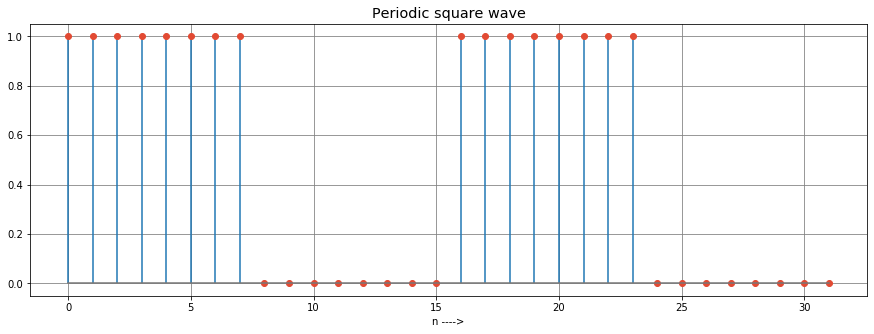

In [12]:
# Plotting periodic square wave:

from matplotlib import style
a = []
n = np.arange(32)
for i in range(2):
    for j in range(16):
        if (j<=7):
            a.append(1)
        else:
            a.append(0)
fig = plt.figure(1,figsize=(15,5))
plt.stem(n,a,'tab:blue',use_line_collection=True)
style.use("ggplot")
plt.grid(color="gray")
plt.xlabel("n ---->")
plt.title("Periodic square wave")
plt.show()


DTFS coefficients of the signal are=

0.5, 0.32, 0.0, 0.11, 0.0, 0.08, 0.0, 0.06, 0.0, 0.06, 0.0, 0.08, 0.0, 0.11, 0.0, 0.32, 

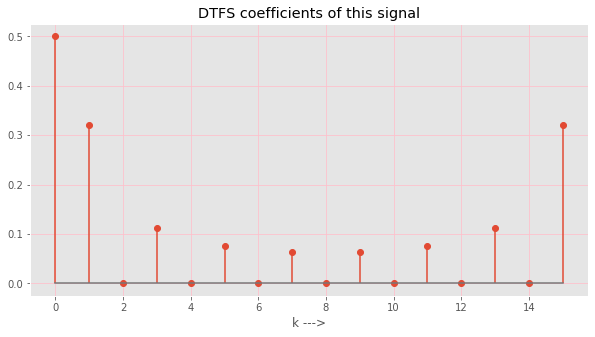

In [13]:
#DTFS coefficients of this signal 

a = np.zeros(16)
n = np.arange(16)
a[0] = 0.5
print("DTFS coefficients of the signal are=\n")
print(a[0],end=", ")
for k in range(1,16):
  a[k] = 1/16*(np.sin(k*0.5*np.pi))/(np.sin(k*np.pi/16))
  print(abs(round(a[k],2)),end=", ")

plt.figure(figsize=(10,5))
style.use("ggplot")
plt.grid(color="pink")
plt.stem(n,abs(a),use_line_collection=True)
plt.xlabel("k --->")
plt.title("DTFS coefficients of this signal")
plt.show()

C:\Users\me\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\me\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\Users\me\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

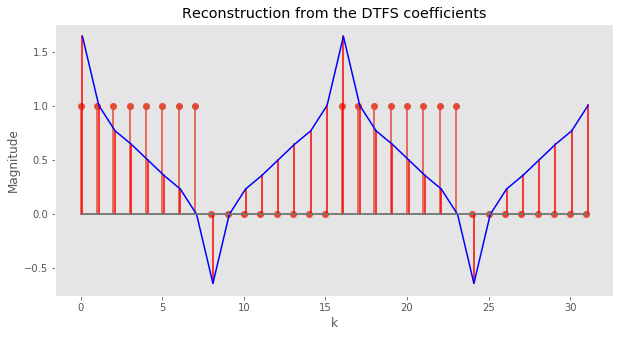

In [14]:
n = np.arange(0,32)
a = [0.5, 0.32, 0.0, 0.11, 0.0, 0.08, 0.0, 0.06, 0.0, 0.06, 0.0, 0.08, 0.0, 0.11, 0.0, 0.32]
x = np.zeros(32)
for i in n:
  for k in range(len(a)):
    x[i] += a[k]*np.exp(1j*k*(pi/8)*i)
y = np.array([1]*8+[0]*8+[1]*8+[0]*8)
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("k")
plt.ylabel("Magnitude")
plt.title("Reconstruction from the DTFS coefficients")
plt.stem(n,y)
plt.stem(n+0.1,x,'r',markerfmt="blue")

# Continuous Time Fourier Transform:
Consider a rectangular signal with amplitude 5 and existing between t = −1 and t = 1. Compute the continuous time Fourier transform of this signal and display a nicely labelled plot. A message signal m(t) is used to modulate a carrier signal c(t) = cos2πfct and the resultant signal is given by y(t) = m(t)c(t). Plot y(t). Compute the Fourier transform of m(t) and y(t) and display the plots. m(t) is a triangular signal existing between t = −1 and t = 1 with a peak amplitude of 1.

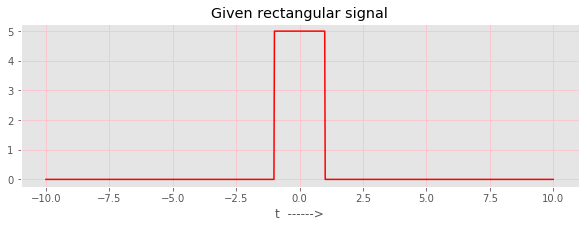

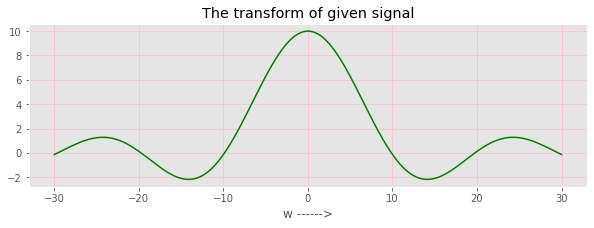

In [15]:
#plotting the Given rectangular signal:

plt.figure(figsize=(10,3))
T=2
t = np.linspace(-10,10,1000)
rect_t = (t>=(-T/2)) ^ (t>=(T/2))
plt.plot(t,5*rect_t,color='red')
style.use("ggplot")
plt.grid(color="pink")
plt.title("Given rectangular signal")
plt.xlabel('t  ------>')

plt.show()

#The transform of given signal:

plt.figure(figsize=(10,3))
w = np.linspace(-30,30,1000)
sinc_t = 10*np.sin(w/np.pi)/(w/np.pi)
style.use("ggplot")
plt.grid(color="pink")
plt.plot(w,sinc_t,color='green')
plt.title("The transform of given signal")
plt.xlabel('w ------>')
plt.show()


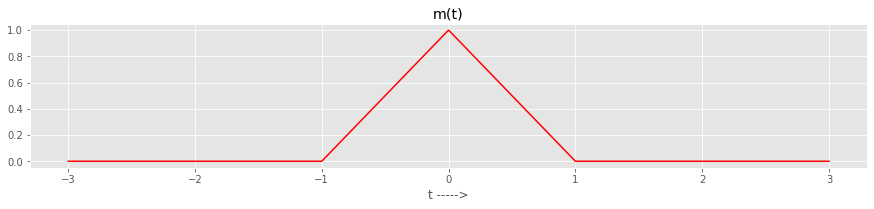

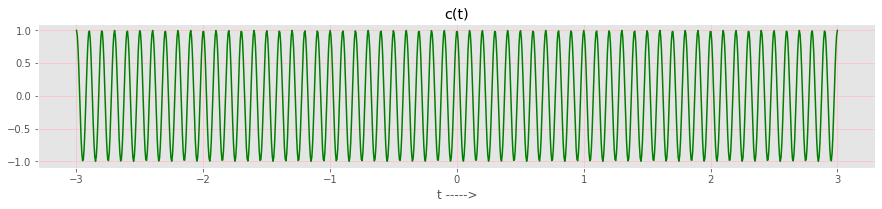

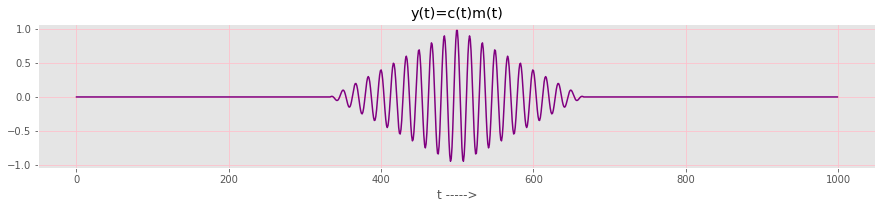

In [16]:
# Defining the message signal m(t):

t = np.linspace(-3,3,1000)
fig = plt.figure(1,figsize=(15,9))
T=1
tri_t = (1 - (abs(t)/T)) * (abs(t) < T)
plt.subplot(3,1,1)
plt.plot(t,tri_t,color='red')
plt.xlabel("t ----->")
plt.title("m(t)")
plt.show()

# Defining the carrier signal c(t):
c_t = np.cos(2*np.pi*10*t)
fig = plt.figure(1,figsize=(15,9))
plt.subplot(3,1,2)
plt.plot(t,c_t,color='green')
plt.grid(color="pink")
plt.xlabel("t ----->")
plt.title("c(t)")
plt.show()

# Defining the signal y(t):

y_t = c_t*tri_t
fig = plt.figure(1,figsize=(15,9))
plt.subplot(3,1,3)
plt.plot(y_t,color='purple')
plt.grid(color="pink")
plt.xlabel("t ----->")
plt.title("y(t)=c(t)m(t)")
plt.show()

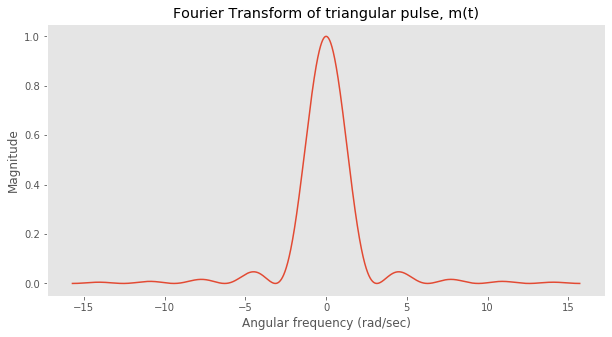

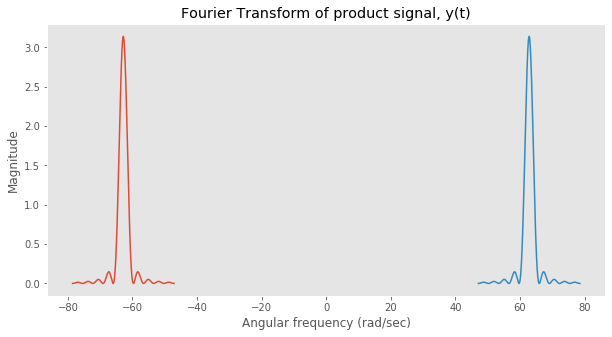

In [17]:
# Fourier transform of the product m(t)*c(t) is (1/2pi).(M(w)*C(w)). Product in time domain changes to convolution in frequency domain.

omega = np.arange(-5*pi,5*pi,0.01)
plt.figure(1,figsize=(10,5))
plt.grid()
plt.xlabel("Angular frequency (rad/sec)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of triangular pulse, m(t)")
plt.plot(omega,((1/omega)*np.sin(omega))**2)
plt.figure(2,figsize=(10,5))
plt.grid()
plt.xlabel("Angular frequency (rad/sec)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of product signal, y(t)")
plt.plot(omega-2*pi*10,pi*((1/omega)*np.sin(omega))**2)
plt.plot(omega+2*pi*10,pi*((1/omega)*np.sin(omega))**2)

# Bonus

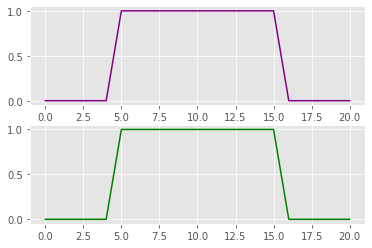

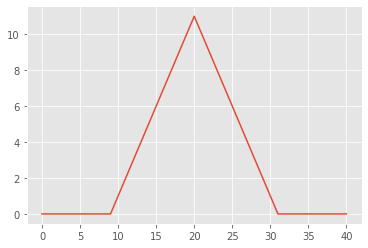

In [18]:
t=np.linspace(-10,10,21)
plt.subplot(2,1,1)
s1=(abs(t)<=5)
plt.plot(s1,"purple")
plt.subplot(2,1,2)
s2=(abs(t)<=5)
plt.plot(s2,"g")
plt.figure()
sig=convolution(s1,s2)
plt.plot(sig)